In [ ]:
pip install requests


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import requests
import json

In [ ]:

response = requests.get("https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information")
response2 = requests.get("https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_status")
data = response.json()
data2 = response2.json()
array_stations = (data['data']['stations'])
#array_stations = array_stations[0:50]
array_stations_status = data2['data']['stations']
#array_stations_status = array_stations_status[0:50]

'''array_station_final =[]
array_station_status_final = []
for i in range (1,51):
  i = i * 5
  array_station_final.append(array_stations[i])
  array_station_status_final.append(array_stations_status[i])'''


df = pd.DataFrame.from_dict(array_stations)
df2 = pd.DataFrame.from_dict(array_stations_status)
df3 = pd.read_csv('/content/pop_near_stations.csv')

In [ ]:
df_clean = df.drop(columns = ["physical_configuration", "altitude", "name", "address","is_charging_station", "rental_methods", "groups", "obcn","_ride_code_support", "post_code","cross_street" ])
df2_clean = df2.drop(columns = [ "num_bikes_available_types", "last_reported", "is_charging_station", "status" ,"is_installed" ,"is_renting", "is_returning","traffic" ])
df_merged1 = pd.merge(df_clean, df2_clean)

df_merged1['station_id']=df_merged1['station_id'].astype(int)
df_merged = pd.merge(df_merged1, df3, on='station_id')
df_merged = df_merged.drop(columns = ['station_id' , 'num_bikes_disabled','num_docks_disabled','nearby_distance','num_docks_available'])

In [ ]:
df_merged = df_merged.head(50)

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X, y = load_wine(return_X_y=True, as_frame=True)
# Scaling is important when working with distance based
# (e.g., euklidian) cluster algorithms
scaler = StandardScaler()
X_std = scaler.fit_transform(df_merged)
# Since the fit_transform() strips the column headers
# we add them after the transformation
X_std = pd.DataFrame(X_std, columns=df_merged.columns)
# Let's define max. 6 different cluster colors - if you like you can add here more.
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252', '#a4d8a8']
X_std


,lat,lon,capacity,num_bikes_available,SUM_Population__2016
0,-1.710542,-0.756520,1.210596,-0.316026,1.895598
1,1.060367,0.328760,0.242979,-0.990471,-0.075277
2,1.321540,-1.060570,-0.509611,-1.279519,-1.428204
3,1.302245,-1.352108,-0.939663,-1.183170,-0.121680
4,0.129148,-0.156731,-1.369715,-0.508724,-0.838875
5,-0.809903,0.361424,-0.509611,0.454769,-0.391262
6,0.561452,0.155982,-0.509611,0.358419,-0.391262
7,0.308861,-0.950149,-0.509611,-0.894122,-0.838875
8,0.885267,-0.421495,-0.509611,-0.219676,-0.391262
9,-0.553652,1.314261,0.135466,0.647467,-0.075277


/usr/local/lib/python3.8/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.8/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


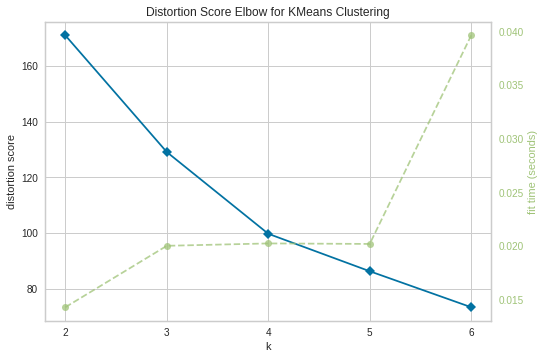

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KMeans(), k=(2,7),ax=ax)
visualizer.fit(X_std)

ax.set_xticks(range(2,7))
visualizer.show()
plt.show()

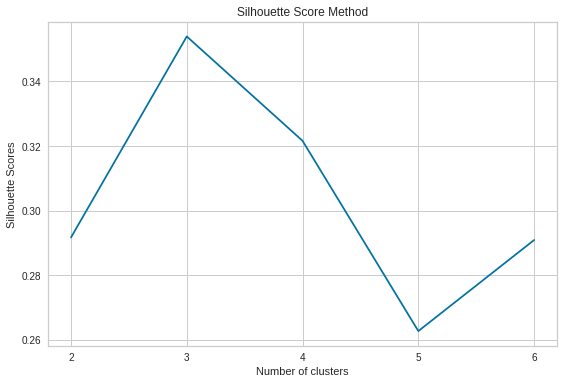

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 7):
    km = KMeans(n_clusters=k,
                max_iter=300,
                tol=1e-04,
                init='k-means++',
                n_init=10,
                random_state=42,
                algorithm='auto')
    km.fit(X_std)
    silhouette_scores.append(silhouette_score(X_std, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

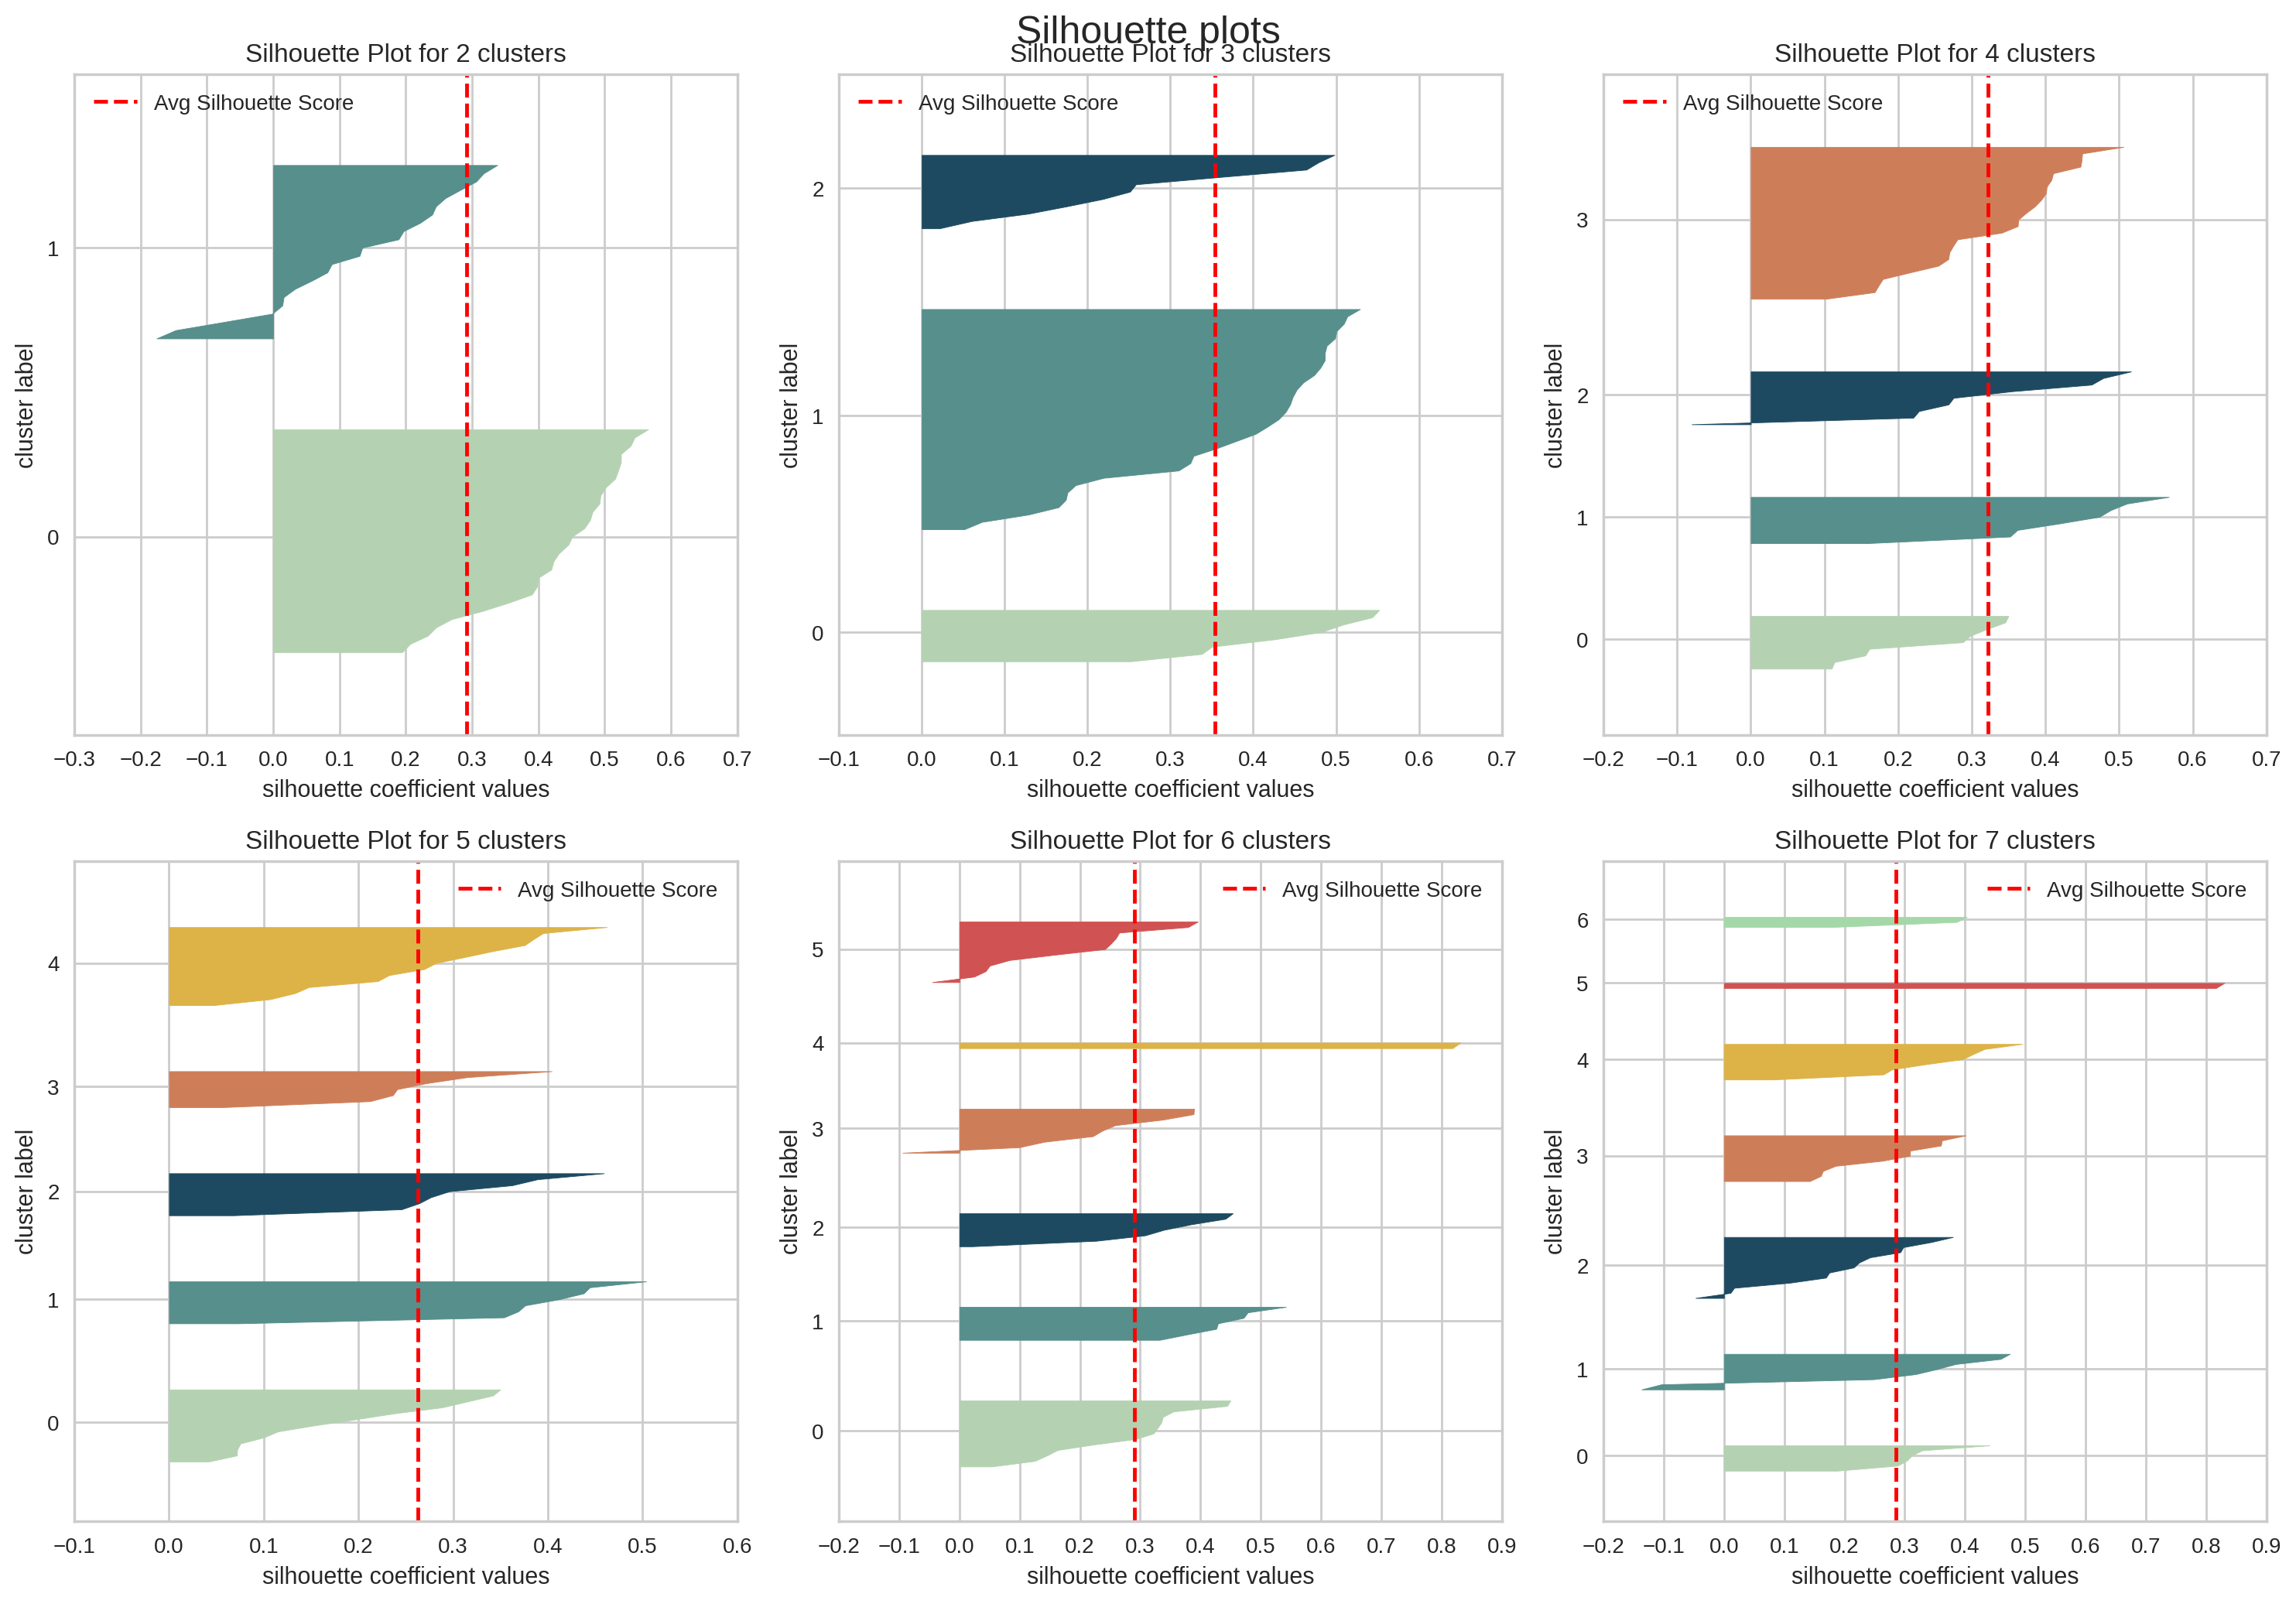

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.ticker as ticker

def silhouette_plot(X, model, ax, colors):
    y_lower = 10
    y_tick_pos_ = []
    sh_samples = silhouette_samples(X, model.labels_)
    sh_score = silhouette_score(X, model.labels_)

    for idx in range(model.n_clusters):
        values = sh_samples[model.labels_ == idx]
        values.sort()
        size = values.shape[0]
        y_upper = y_lower + size
        ax.fill_betweenx(np.arange(y_lower, y_upper),0,values,
                         facecolor=colors[idx],edgecolor=colors[idx]
        )
        y_tick_pos_.append(y_lower + 0.5 * size)
        y_lower = y_upper + 10

    ax.axvline(x=sh_score, color="red", linestyle="--", label="Avg Silhouette Score")
    ax.set_title("Silhouette Plot for {} clusters".format(model.n_clusters))
    l_xlim = max(-1, min(-0.1, round(min(sh_samples) - 0.1, 1)))
    u_xlim = min(1, round(max(sh_samples) + 0.1, 1))
    ax.set_xlim([l_xlim, u_xlim])
    ax.set_ylim([0, X.shape[0] + (model.n_clusters + 1) * 10])
    ax.set_xlabel("silhouette coefficient values")
    ax.set_ylabel("cluster label")
    ax.set_yticks(y_tick_pos_)
    ax.set_yticklabels(str(idx) for idx in range(model.n_clusters))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.legend(loc="best")
    return ax


# Plot for multiple ks
k_max = 7
ncols = 3
# calculate number of rows
nrows = k_max // ncols + (k_max % ncols > 0)
# set figure size
fig = plt.figure(figsize=(15,15), dpi=200)

for k in range(2,k_max+1):

    # Apply clustering for k clusters
    km = KMeans(n_clusters=k,
                max_iter=300,
                tol=1e-04,
                init='k-means++',
                n_init=10,
                random_state=42,
                algorithm='auto')

    km_fit = km.fit(X_std)

    # create chart
    ax = plt.subplot(nrows, ncols, k-1)
    silhouette_plot(X_std, km_fit,ax, cluster_colors)

fig.suptitle("Silhouette plots", fontsize=18, y=1)
plt.tight_layout()
plt.show()

In [ ]:
pip install data-science-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# here should be qc results as an array
with open('/content/result_QC_euclidean.txt') as f:
    contents = f.readlines()
a = contents[0].replace('[','').replace(']','')
b = a.split(',')
array_result_euclidean = []
for item in b:
  array_result_euclidean.append(int(item))

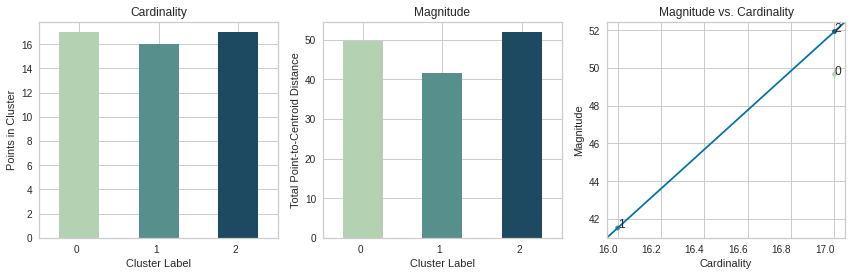

In [ ]:
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt


km = KMeans(n_clusters=3,
                max_iter=300,
                tol=1e-04,
                init='k-means++',
                n_init=10,
                random_state=42,
                algorithm='auto')

km_fit = km.fit(X_std)


fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

plot_cluster_cardinality(array_result_euclidean,
                         ax=ax1,
                         title="Cardinality",
                         color=cluster_colors
                        )
plot_cluster_magnitude(X_std,
                       array_result_euclidean,
                       km_fit.cluster_centers_,
                       euclidean,
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors
                      )
plot_magnitude_vs_cardinality(X_std,
                              array_result_euclidean,
                              km_fit.cluster_centers_,
                              euclidean,
                              color=cluster_colors[0:km_fit.n_clusters],
                              ax=ax3,
                              title="Magnitude vs. Cardinality")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
pip install pacmap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [ ]:
df_y = pd.Series(array_result_euclidean)
df_y

0     0
1     2
2     1
3     0
4     2
5     1
6     0
7     2
8     1
9     0
10    2
11    1
12    0
13    2
14    1
15    0
16    2
17    1
18    0
19    2
20    1
21    0
22    2
23    1
24    0
25    2
26    1
27    0
28    2
29    1
30    0
31    2
32    1
33    0
34    2
35    1
36    0
37    2
38    1
39    0
40    2
41    1
42    0
43    2
44    1
45    0
46    2
47    1
48    0
49    2
dtype: int64

In [ ]:
km2 = KMeans(n_clusters=3,
                max_iter=300,
                tol=1e-04,
                init='k-means++',
                n_init=10,
                random_state=42,
                algorithm='auto')

km_fit2 = km2.fit(X_std)
df_y = km_fit2.labels_

/usr/local/lib/python3.8/dist-packages/pacmap/pacmap.py:819: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


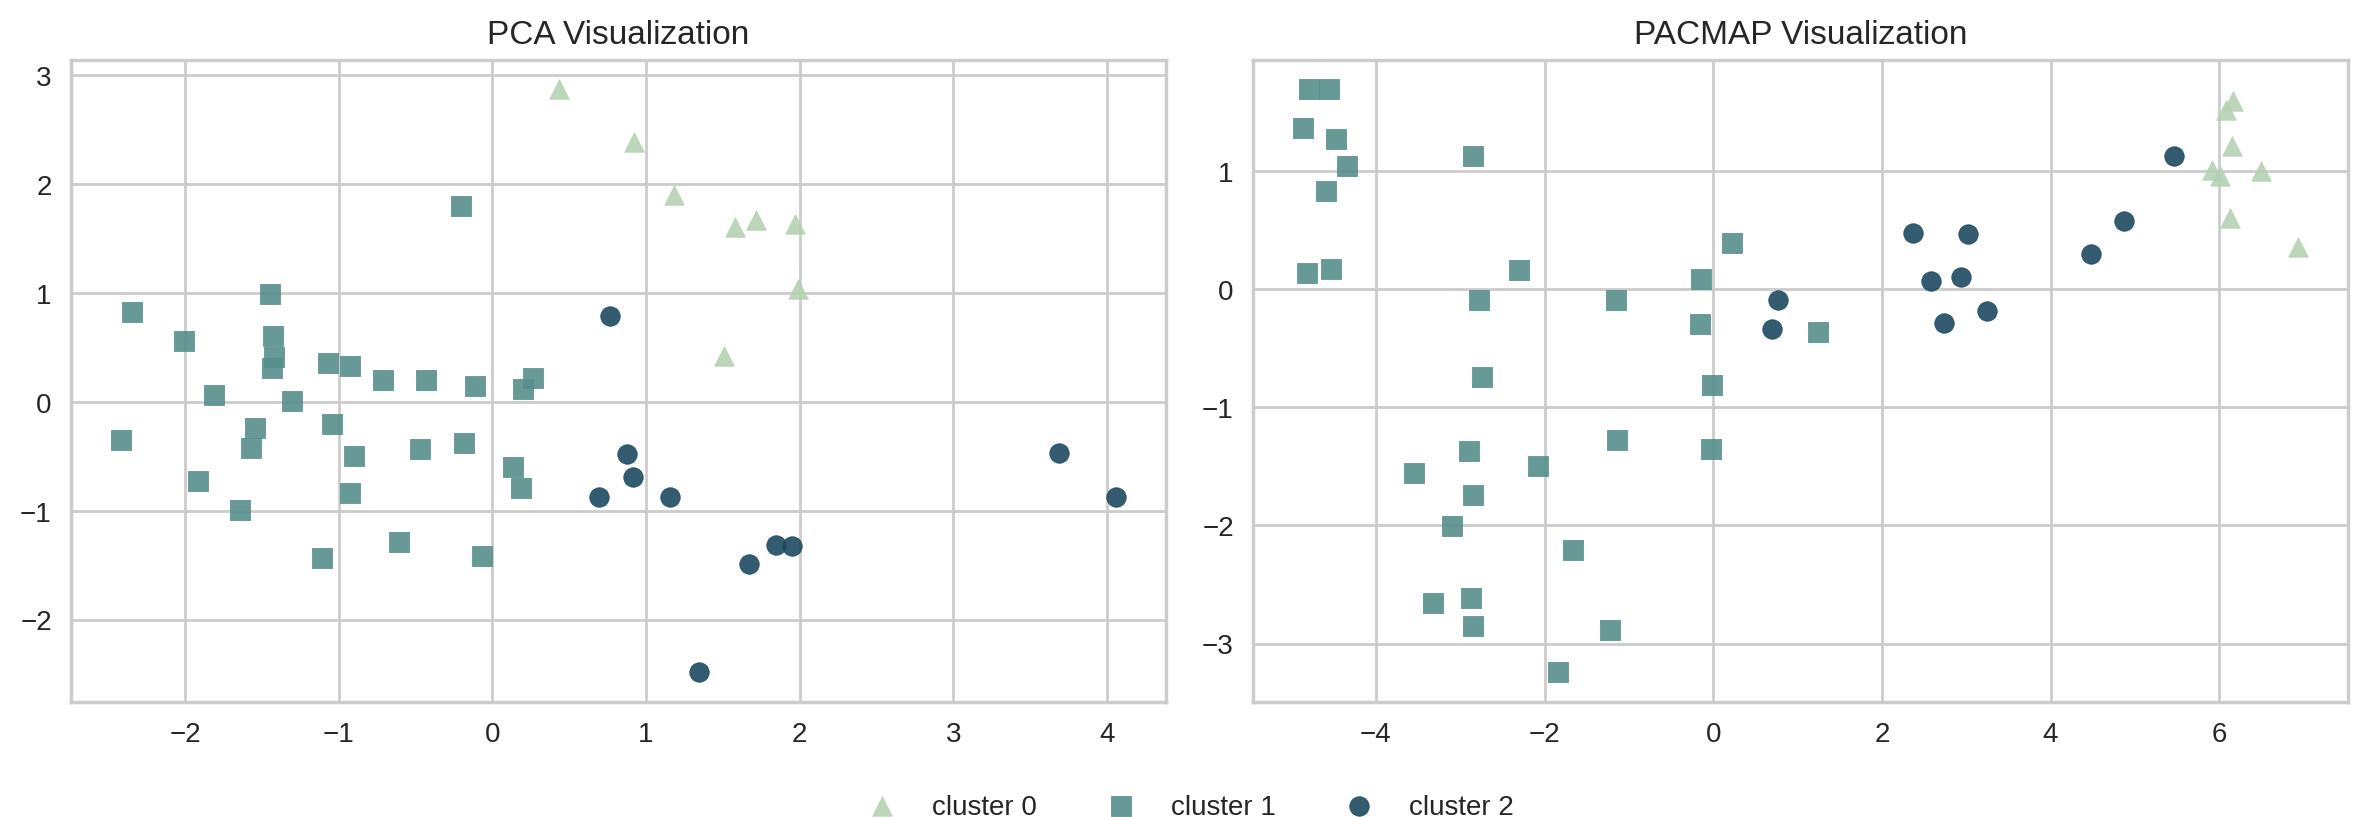

In [ ]:
# Visualizing pca and pacmap
from sklearn.decomposition import PCA
import pacmap

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4), dpi=200)

# PCA
pca_scaled_std = PCA(n_components=2,random_state=42)
X_std_pca = pca_scaled_std.fit_transform(X_std)

for l, c, m in zip(range(0, 3), cluster_colors[0:km_fit.n_clusters], ('^', 's', 'o')):
    ax1.scatter(X_std_pca[df_y == l, 0],
                X_std_pca[df_y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

# PACMAP
embedding = pacmap.PaCMAP(random_state=42)
X_std_pacmap = embedding.fit_transform(X_std.to_numpy())

for l, c, m in zip(range(0, 3), cluster_colors[0:km_fit.n_clusters], ('^', 's', 'o')):
    ax2.scatter(X_std_pacmap[df_y == l, 0],
                X_std_pacmap[df_y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

ax1.set_title("PCA Visualization")
ax2.set_title("PACMAP Visualization")

labels = np.unique(km_fit.labels_)
labels = ["cluster "+str(l) for l in labels]
fig.legend(labels, loc='lower center',ncol=len(labels), bbox_transform=(1,0),borderaxespad=-0.5)
plt.tight_layout()
plt.show()

In [ ]:
df_merged['res_euclidean'] = array_result_euclidean
X_std['res_euclidean'] = array_result_euclidean

In [ ]:
#df_merged['cluster'] = km.labels_
#X_std['cluster'] = km.labels_

In [ ]:
df_merged

,lat,lon,capacity,num_bikes_available,SUM_Population__2016,res_euclidean
0,43.639832,-79.395954,35,9,65913.0,1
1,43.664964,-79.383550,26,4,31340.0,2
2,43.667333,-79.399429,19,0,7607.0,0
3,43.667158,-79.402761,15,1,30526.0,1
4,43.656518,-79.389099,11,8,17945.0,1
5,43.648001,-79.383177,19,18,25797.0,1
6,43.660439,-79.385525,19,18,25797.0,2
7,43.658148,-79.398167,19,2,17945.0,2
8,43.663376,-79.392125,19,11,25797.0,0
9,43.650325,-79.372287,25,20,31340.0,1


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

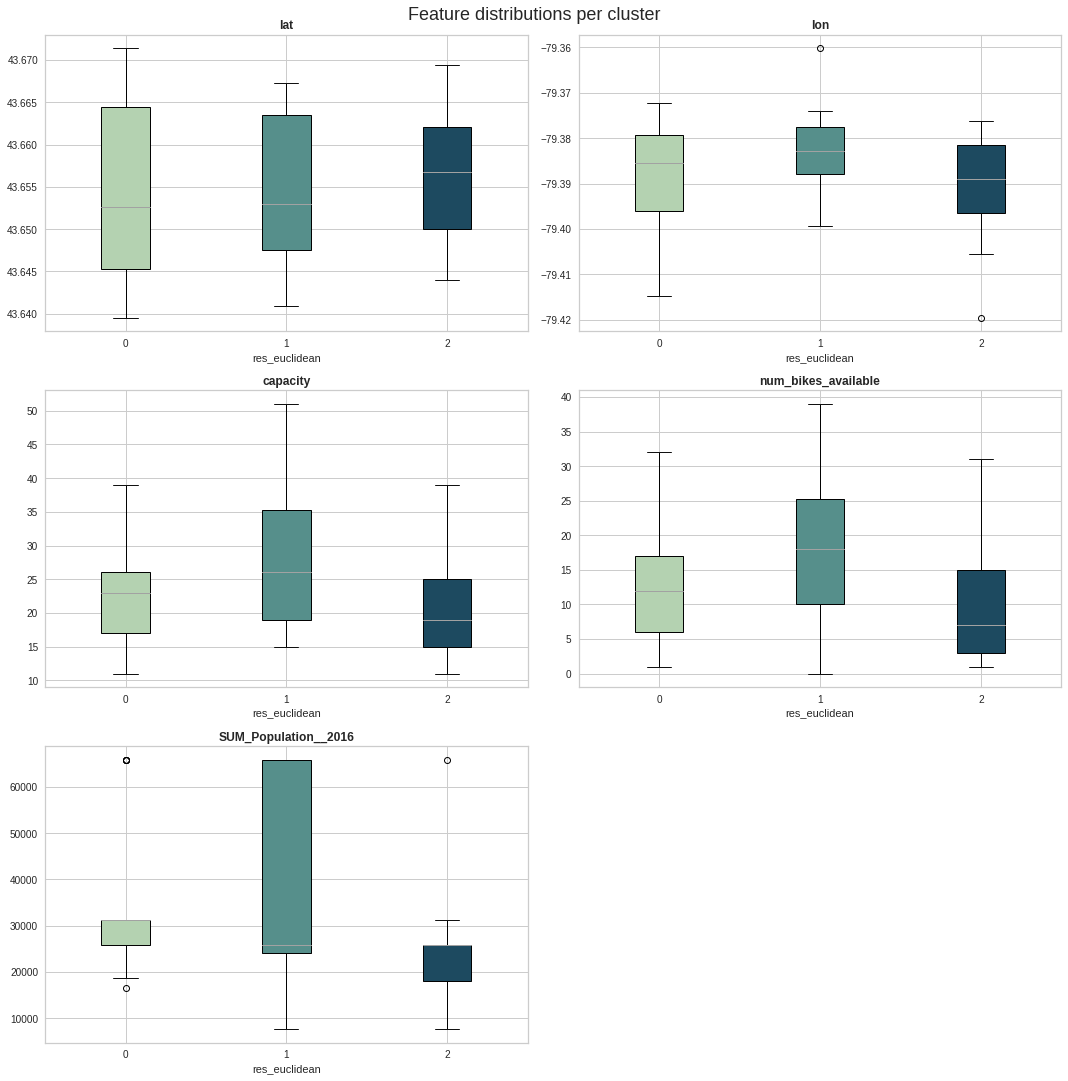

In [ ]:
features = km.feature_names_in_
ncols = 2
nrows = len(features) // ncols + (len(features) % ncols > 0)
fig = plt.figure(figsize=(15,15))

for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = df_merged[[feature, 'res_euclidean']].boxplot(by='res_euclidean',ax=ax,return_type='both',patch_artist = True)

    for row_key, (ax,row) in box.iteritems():
        ax.set_xlabel('res_euclidean')
        ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(cluster_colors[i])

fig.suptitle('Feature distributions per cluster', fontsize=18, y=1)
plt.tight_layout()
plt.show()

In [ ]:
X_mean = pd.concat([pd.DataFrame(df_merged.mean().drop('res_euclidean'), columns=['mean']),
                   df_merged.groupby('res_euclidean').mean().T], axis=1)

X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'],5)*100, axis = 1)
X_dev_rel.drop(columns=['mean'], inplace=True)
X_mean.drop(columns=['mean'], inplace=True)

X_std_mean = pd.concat([pd.DataFrame(X_std.mean().drop('res_euclidean'), columns=['mean']),
                   X_std.groupby('res_euclidean').mean().T], axis=1)

X_std_dev_rel = X_std_mean.apply(lambda x: round((x-x['mean'])/x['mean'],5)*100, axis = 1)
X_std_dev_rel.drop(columns=['mean'], inplace=True)
X_std_mean.drop(columns=['mean'], inplace=True)

In [ ]:
X_dev_rel

,0,1,2
lat,-0.000,-0.002,0.002
lon,0.001,-0.006,0.004
capacity,-5.099,20.840,-14.515
num_bikes_available,-9.196,36.483,-25.142
SUM_Population__2016,9.763,11.630,-20.709


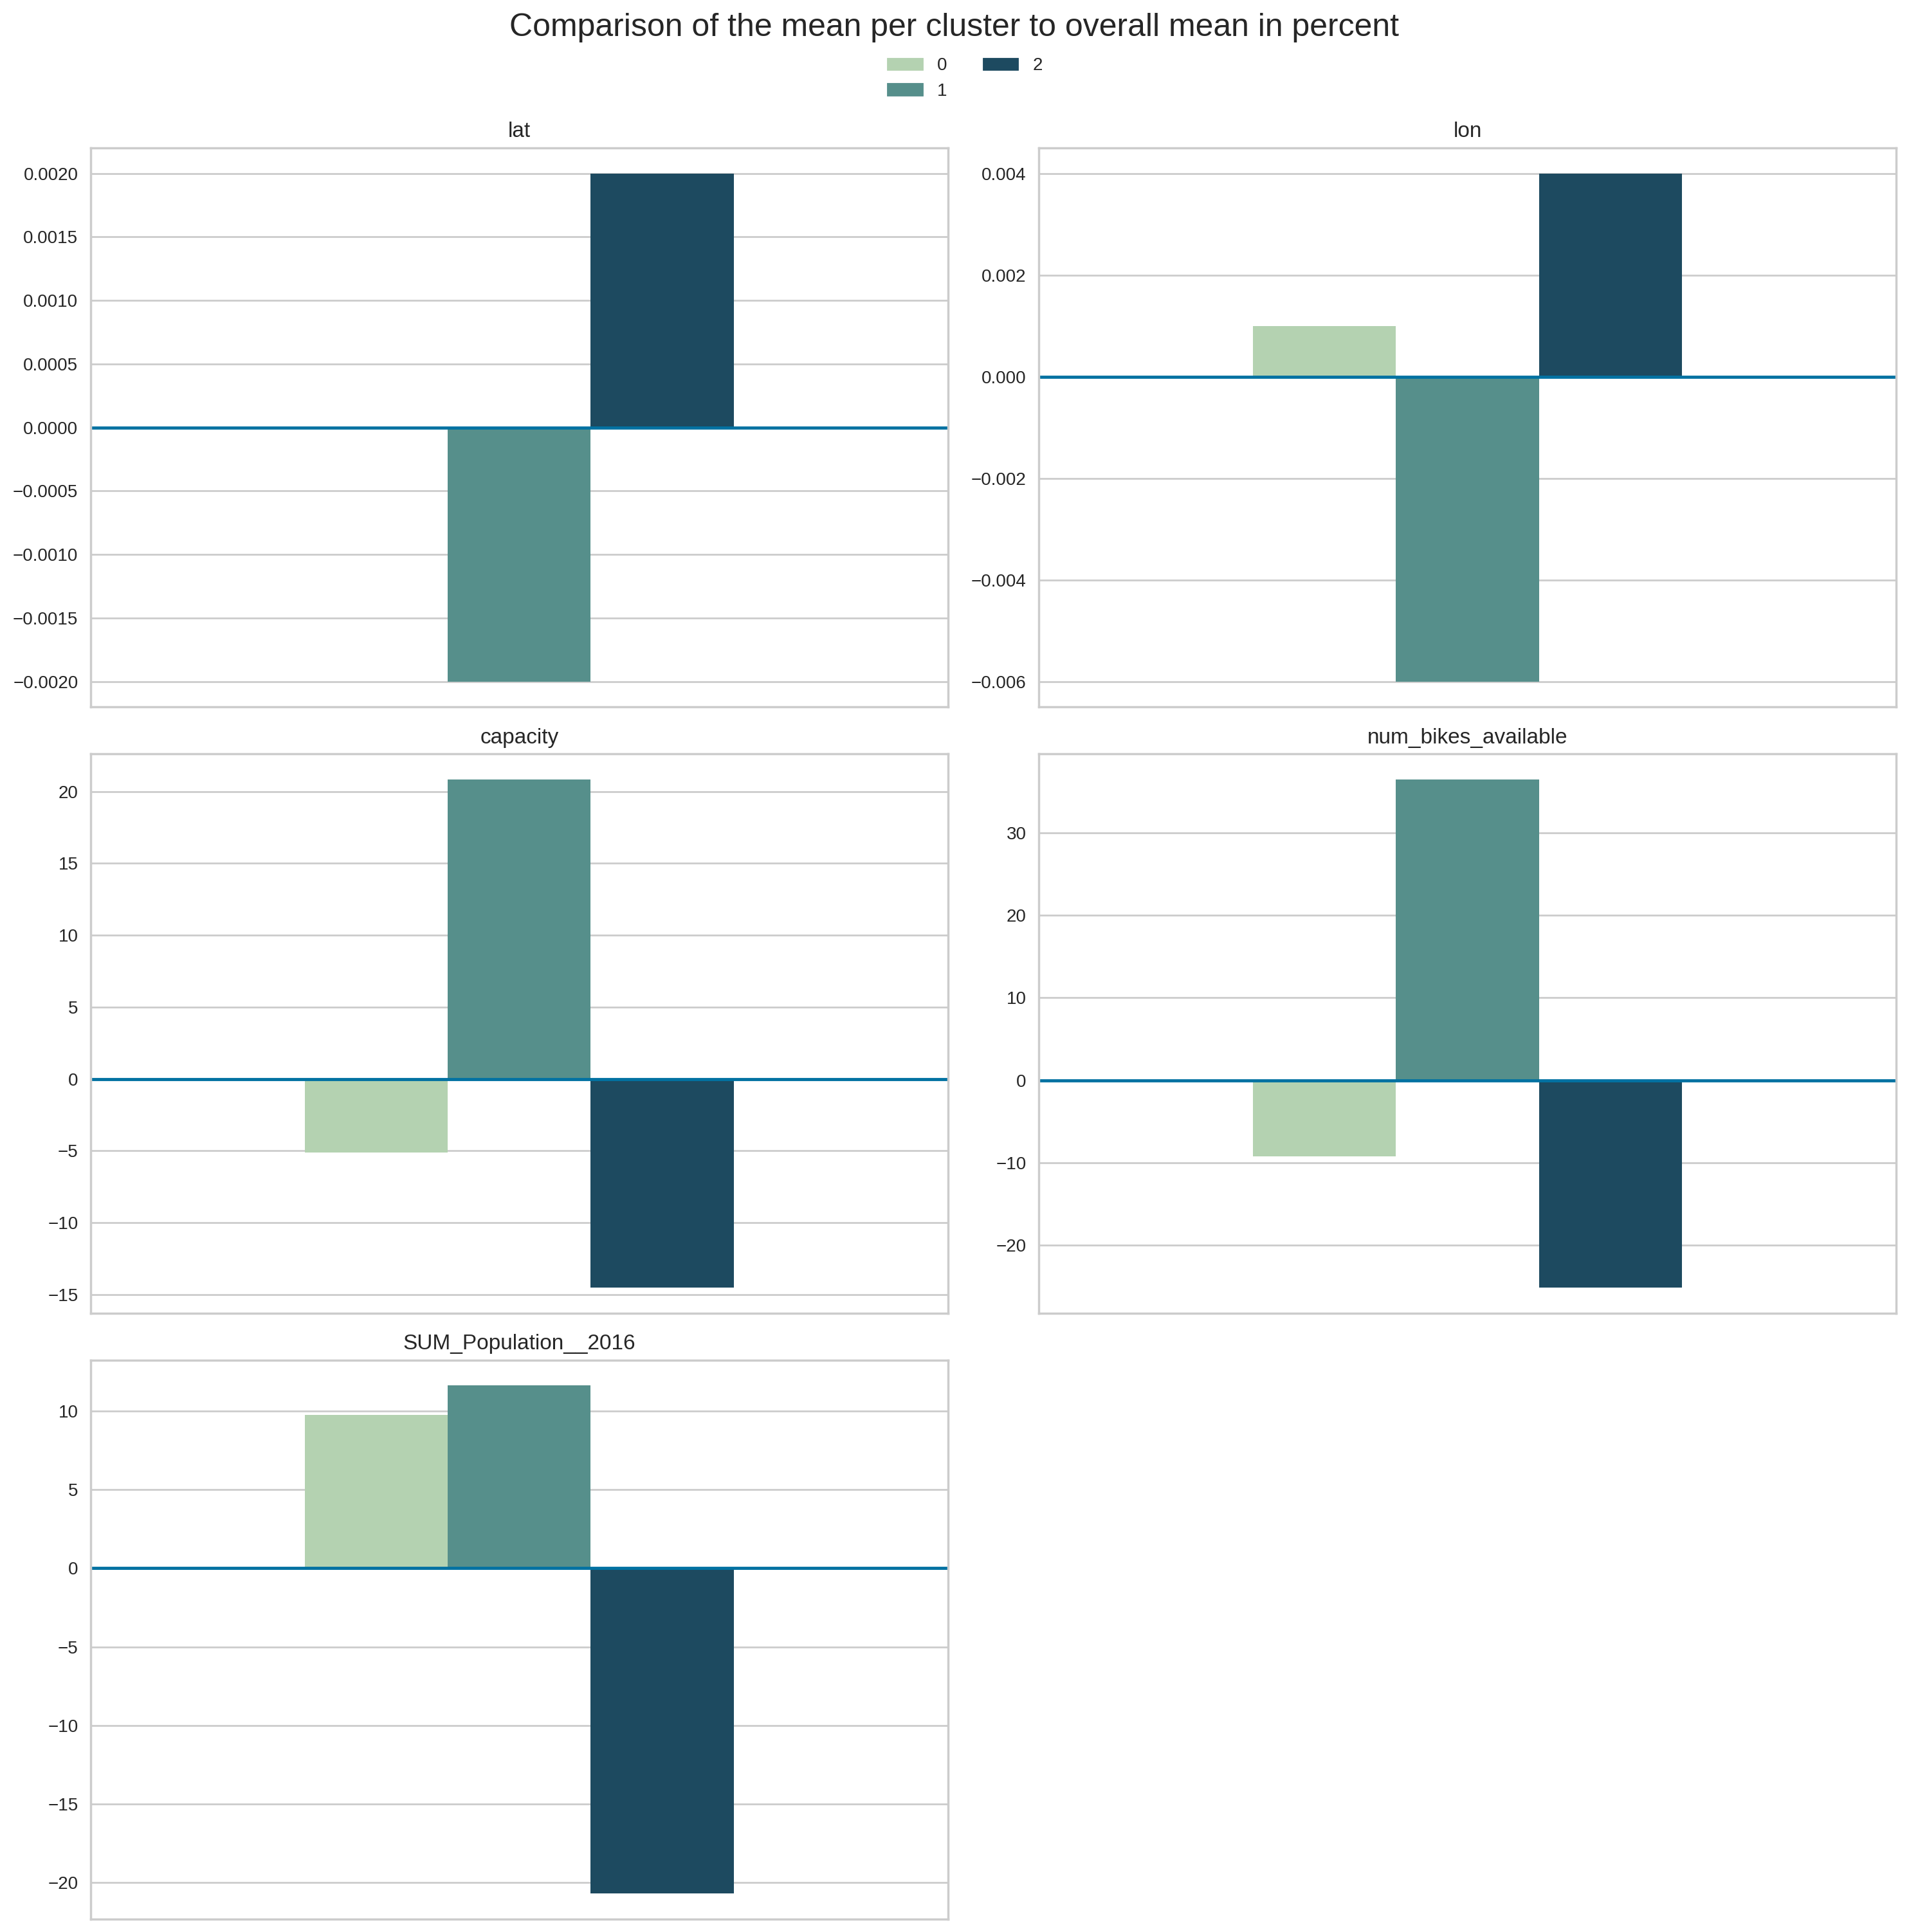

In [ ]:
import matplotlib.patches as mpatches
def cluster_comparison_bar(X_comparison, colors, deviation=True ,title="Cluster results"):

    features = X_comparison.index
    ncols = 2
    # calculate number of rows
    nrows = len(features) // ncols + (len(features) % ncols > 0)
    # set figure size
    fig = plt.figure(figsize=(15,15), dpi=200)
    #interate through every feature
    for n, feature in enumerate(features):
        # create chart
        ax = plt.subplot(nrows, ncols, n + 1)
        X_comparison[X_comparison.index==feature].plot(kind='bar', ax=ax, title=feature,
                                                             color=colors[0:df_merged.res_euclidean.nunique()],
                                                             legend=False
                                                            )
        plt.axhline(y=0)
        x_axis = ax.axes.get_xaxis()
        x_axis.set_visible(False)

    c_labels = X_comparison.columns.to_list()
    c_colors = colors[0:3]
    mpats = [mpatches.Patch(color=c, label=l) for c,l in list(zip(colors[0:df_merged.res_euclidean.nunique()],
                                                                  X_comparison.columns.to_list()))]

    fig.legend(handles=mpats,
               ncol=ncols,
               loc="upper center",
               fancybox=True,
               bbox_to_anchor=(0.5, 0.98)
              )
    axes = fig.get_axes()

    fig.suptitle(title, fontsize=18, y=1)
    #fig.supylabel('Deviation from overall mean in %')
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()

cluster_comparison_bar(X_dev_rel, cluster_colors, title="Comparison of the mean per cluster to overall mean in percent")

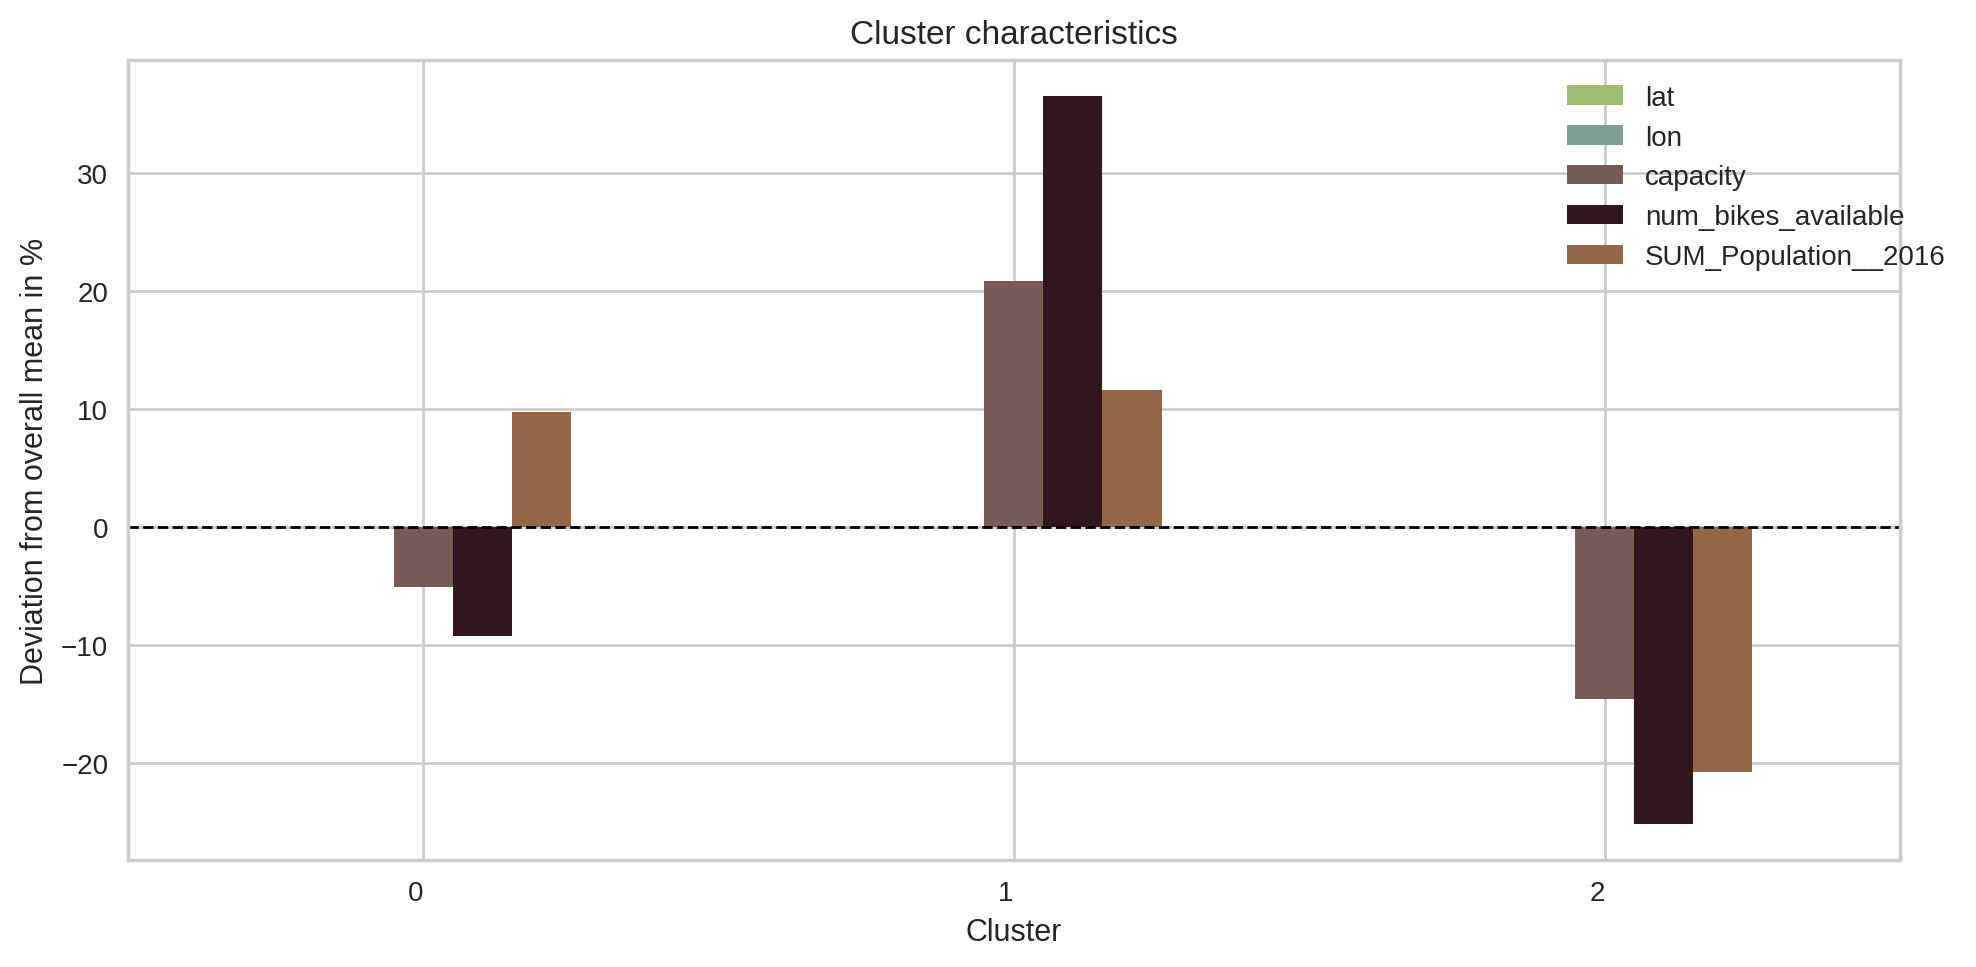

In [ ]:
colors = ['#9EBD6E','#81a094','#775b59','#32161f', '#946846', '#E3C16F', '#fe938c', '#E6B89C','#EAD2AC',
          '#DE9E36', '#4281A4','#37323E','#95818D'
         ]

fig = plt.figure(figsize=(10,5), dpi=200)
X_dev_rel.T.plot(kind='bar',
                       ax=fig.add_subplot(),
                       title="Cluster characteristics",
                       color=colors,
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %"
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

values before [-0.02283892389367775, -0.09552861855463259, -0.13015392483117982, -0.11765950855980185, 0.18178098836249396]
values0 -0.02283892389367775
values after [-0.02283892 -0.09552862 -0.13015392 -0.11765951  0.18178099 -0.02283892]
values before [-0.0774116425467332, 0.38433768874443486, 0.5319203708813642, 0.46681239992909834, 0.21653086909884053]
values0 -0.0774116425467332
values after [-0.07741164  0.38433769  0.53192037  0.4668124   0.21653087 -0.07741164]
values before [0.09569694040990913, -0.26620097085482003, -0.37047701246892706, -0.32169333843229064, -0.38557474751434384]
values0 0.09569694040990913
values after [ 0.09569694 -0.26620097 -0.37047701 -0.32169334 -0.38557475  0.09569694]


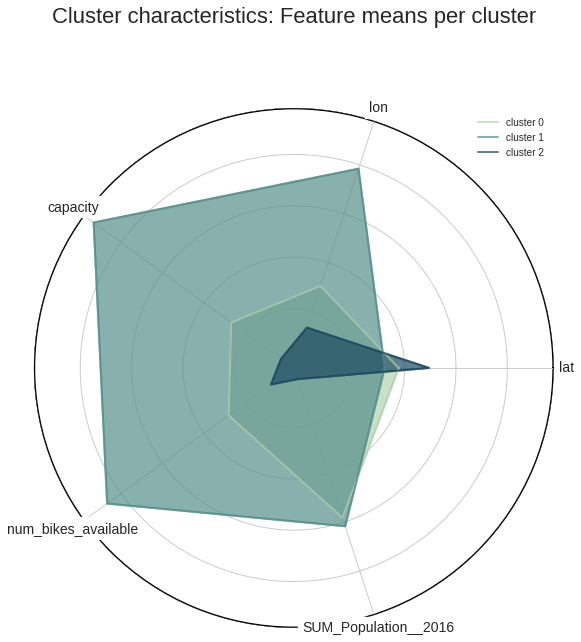

In [ ]:
class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)

        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]
        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14, backgroundcolor="white",zorder=999) # Feature names
        self.ax.set_yticklabels([])

        for ax in self.axes[1:]:
            ax.xaxis.set_visible(False)
            ax.set_yticklabels([])
            ax.set_zorder(-99)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.spines['polar'].set_color('black')
            ax.spines['polar'].set_zorder(-99)

    def plot(self, values, *args, **kw):
        print("values before", str(values))
        print("values0", str(values[0]))

        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        print("values after", str(values))
        self.ax.plot(angle, values, *args, **kw)
        kw['label'] = '_noLabel'
        self.ax.fill(angle, values,*args,**kw)

fig = plt.figure(figsize=(8, 8))
no_features = len(km.feature_names_in_)
#radar = Radar(fig, km.feature_names_in_, np.unique(km.labels_))
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']
radar = Radar(fig, km.feature_names_in_, np.unique(array_result_euclidean))
for k in range(0,km.n_clusters):
    cluster_data = X_std_mean[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
plt.show()